# Tarea 5 Proyecto analisis de datos

Para realizar el proyecto usaremos el módelo de Árboles de decisión, dado que la predicción sera sobre una varible categorica y teniendo en cuenta las conclusiones obtenidas en EDA, concluyo que este modelo dara mejores resultados.

In [36]:
# Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# Cargar el dataset
dsTitanic = pd.read_csv('Titanic-Dataset.csv')
dsTitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Descripción de las variables:

**- PassengerId:** Identificador unico en el conjunto de datos para cada pasajero.

**- Survived:** Indica la supervivencia del pasajero 1(sobrevive), 0(fallece).

**- Pclass:** La clase en la que viajaba el pasajero (1, 2, 3).

**- Name:** Nombre del pasajero.

**- Sex:** Sexo del pasajero.

**- Age:** Edad del pasajero.

**- SibSp:** Número de familiares en la embarcación.

**- Parch:** Padres e hijo abordo.

**- Ticket:** Código del tiquete con el cual se realizo el viaje.

**- Fare:** Tarifa del tiquete en libras esterlinas.

**- Cabin:** Número de cabina en la cual viajaba el pasajero.

**- Embarked:** Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).

In [3]:
#Revisamos que los datos esten completos y luego vemos la descripción estadistica de los datos
dsTitanic.shape

(891, 12)

In [4]:
dsTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Confirmamos si hay datos faltantes, en este caso hay bastantes datos faltantes en la edad y la cabina
dsTitanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

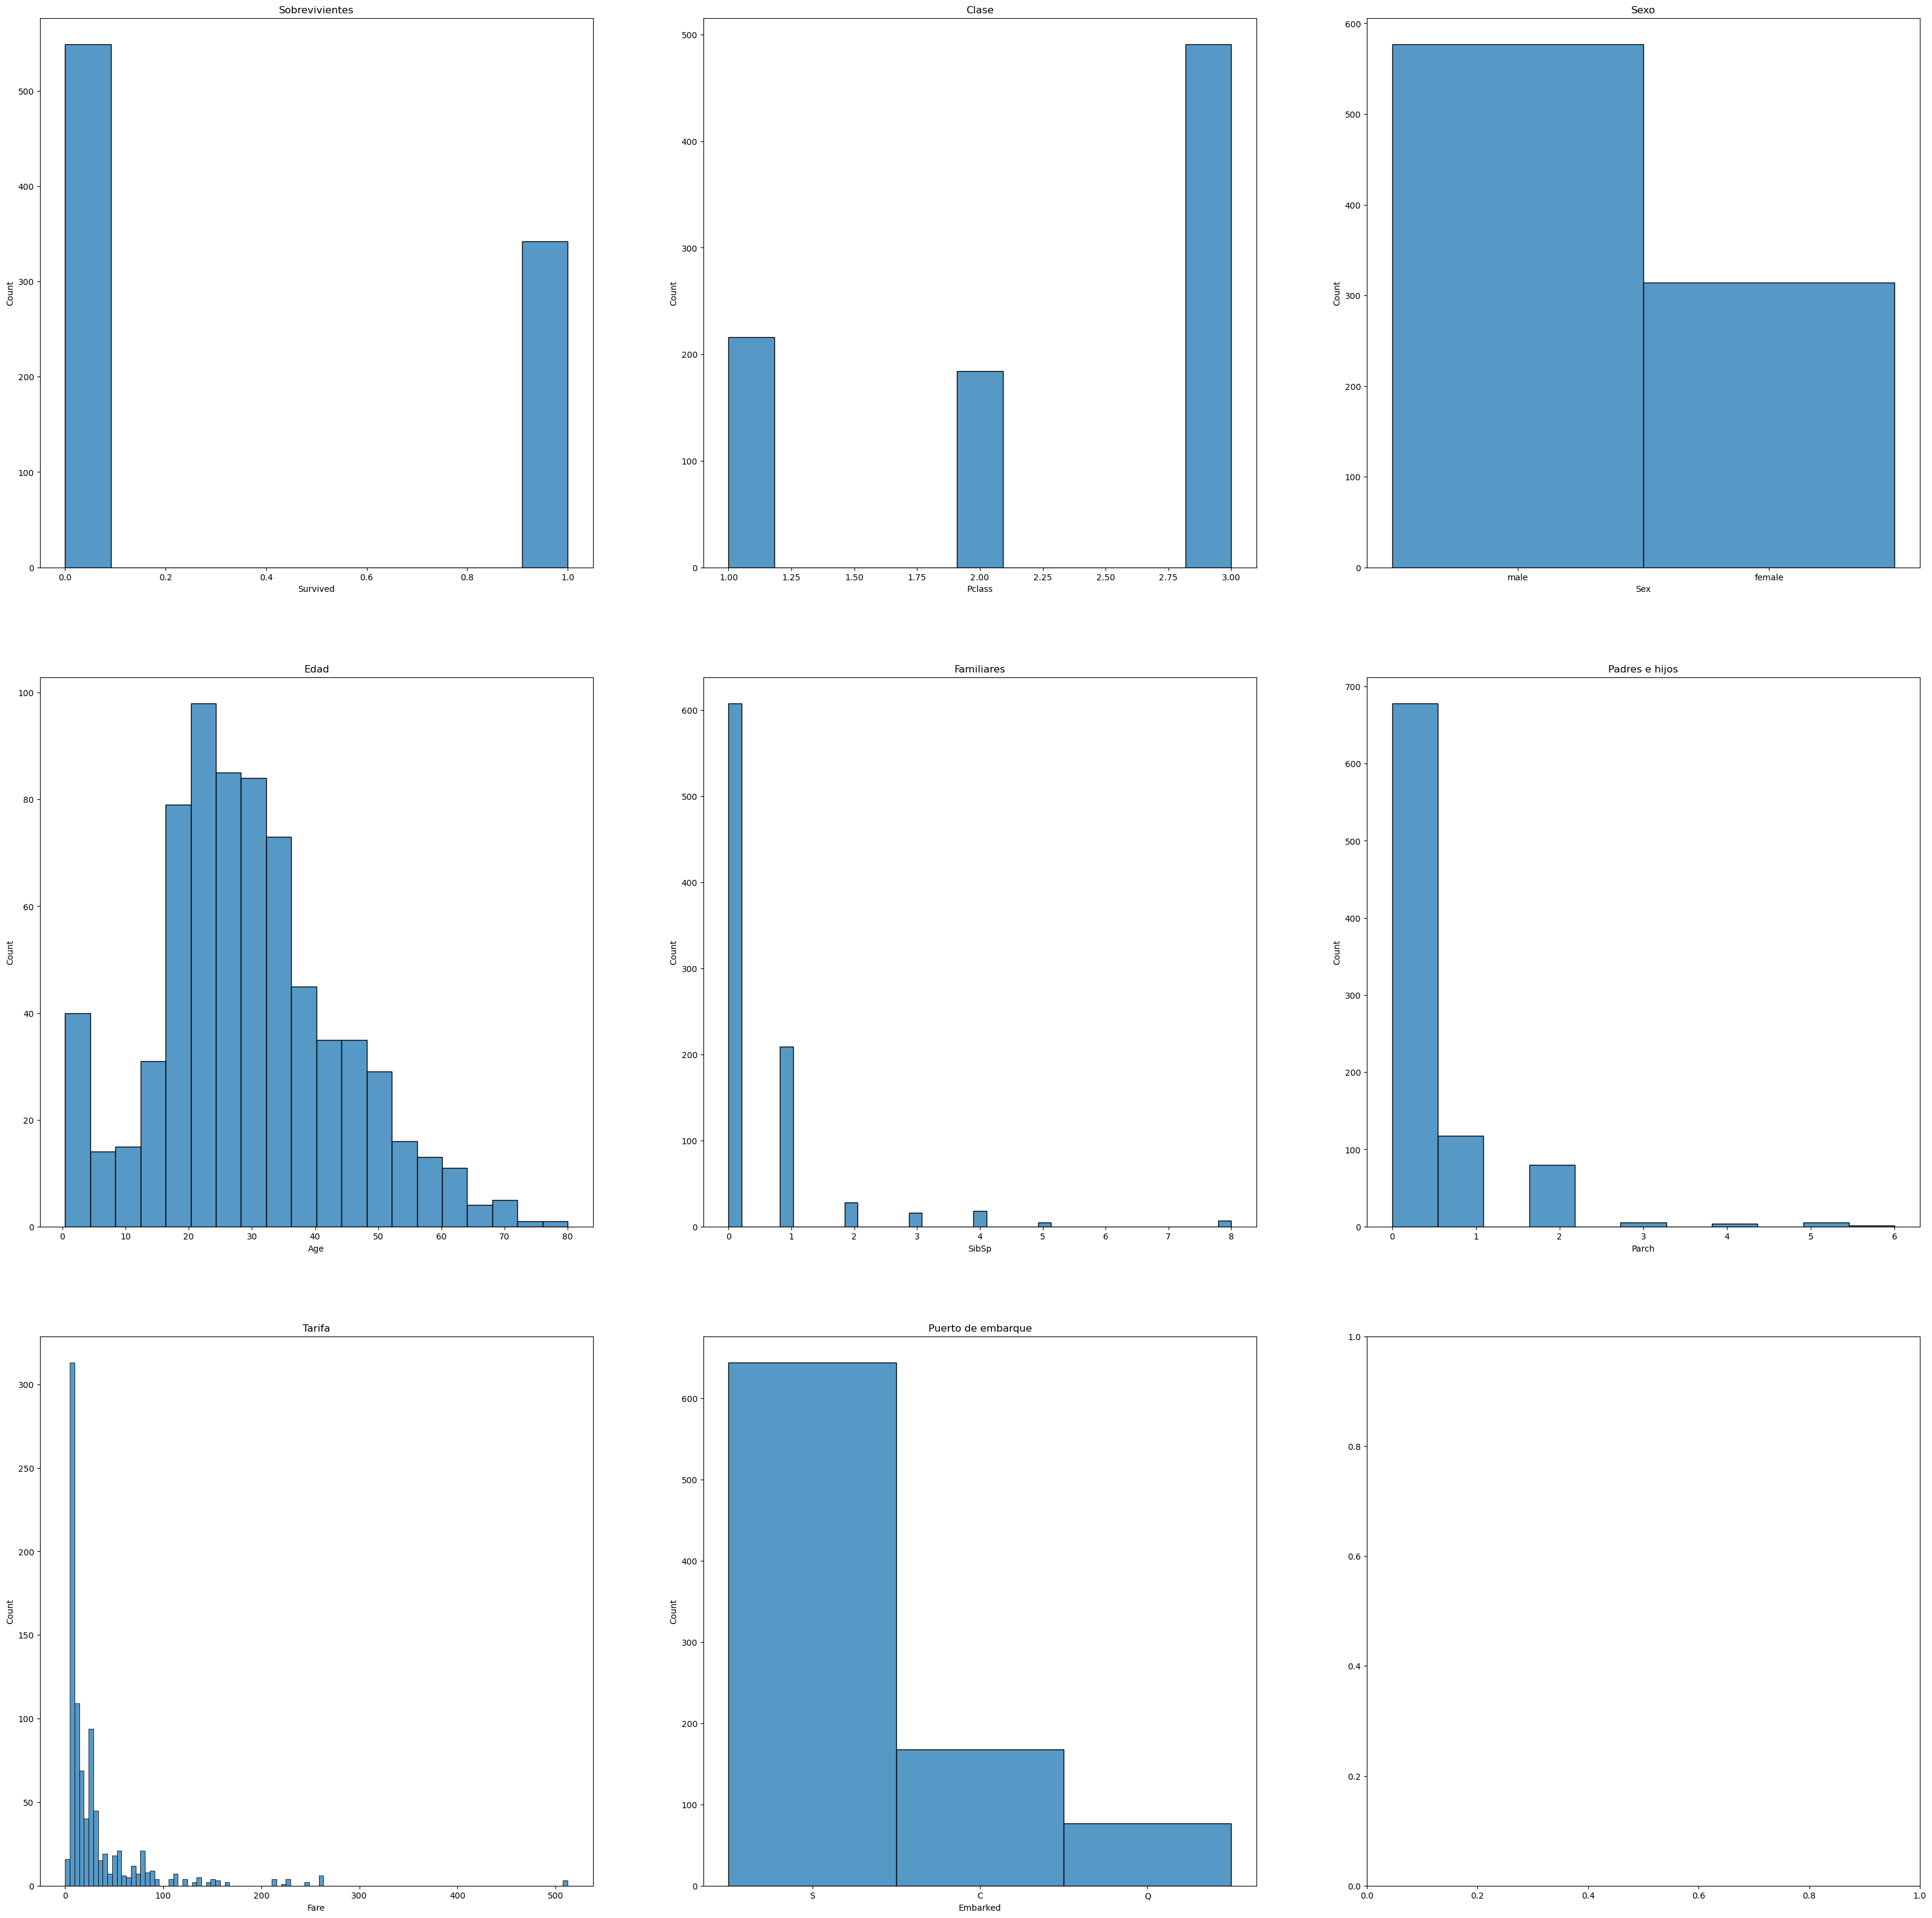

In [6]:
#Librería para evitar advertencias 
import warnings
warnings.filterwarnings('ignore')
#Graficamos los datos relevantes, se deja fuera cabina por la cantidad de datos faltantes, tiquete, nombre e Id del pasajero
fig, axes = plt.subplots(3, 3, figsize = (40, 40))
sns.histplot(ax = axes[0, 0], x = dsTitanic["Survived"]).set(title = "Sobrevivientes");
sns.histplot(ax = axes[0, 1], x = dsTitanic["Pclass"]).set(title = "Clase");
sns.histplot(ax = axes[0, 2], x = dsTitanic["Sex"]).set(title = "Sexo");
sns.histplot(ax = axes[1, 0], x = dsTitanic["Age"]).set(title = "Edad");
sns.histplot(ax = axes[1, 1], x = dsTitanic["SibSp"]).set(title = "Familiares");
sns.histplot(ax = axes[1, 2], x = dsTitanic["Parch"]).set(title = "Padres e hijos");
sns.histplot(ax = axes[2, 0], x = dsTitanic["Fare"]).set(title = "Tarifa");
sns.histplot(ax = axes[2, 1], x = dsTitanic["Embarked"]).set(title = "Puerto de embarque");

In [7]:
dsTitanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
dsTitanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
dsTitanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
#Revisamos correlaciones entre las variables
predictors_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target_col = ['Survived']

In [11]:
predictors = dsTitanic[predictors_col]
target = dsTitanic[target_col]

<Axes: >

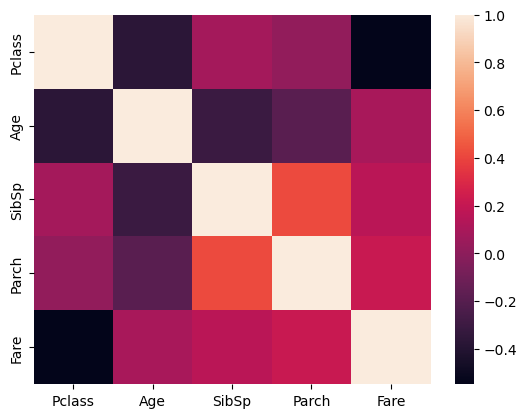

In [12]:
corr = predictors.corr()
sns.heatmap(corr)

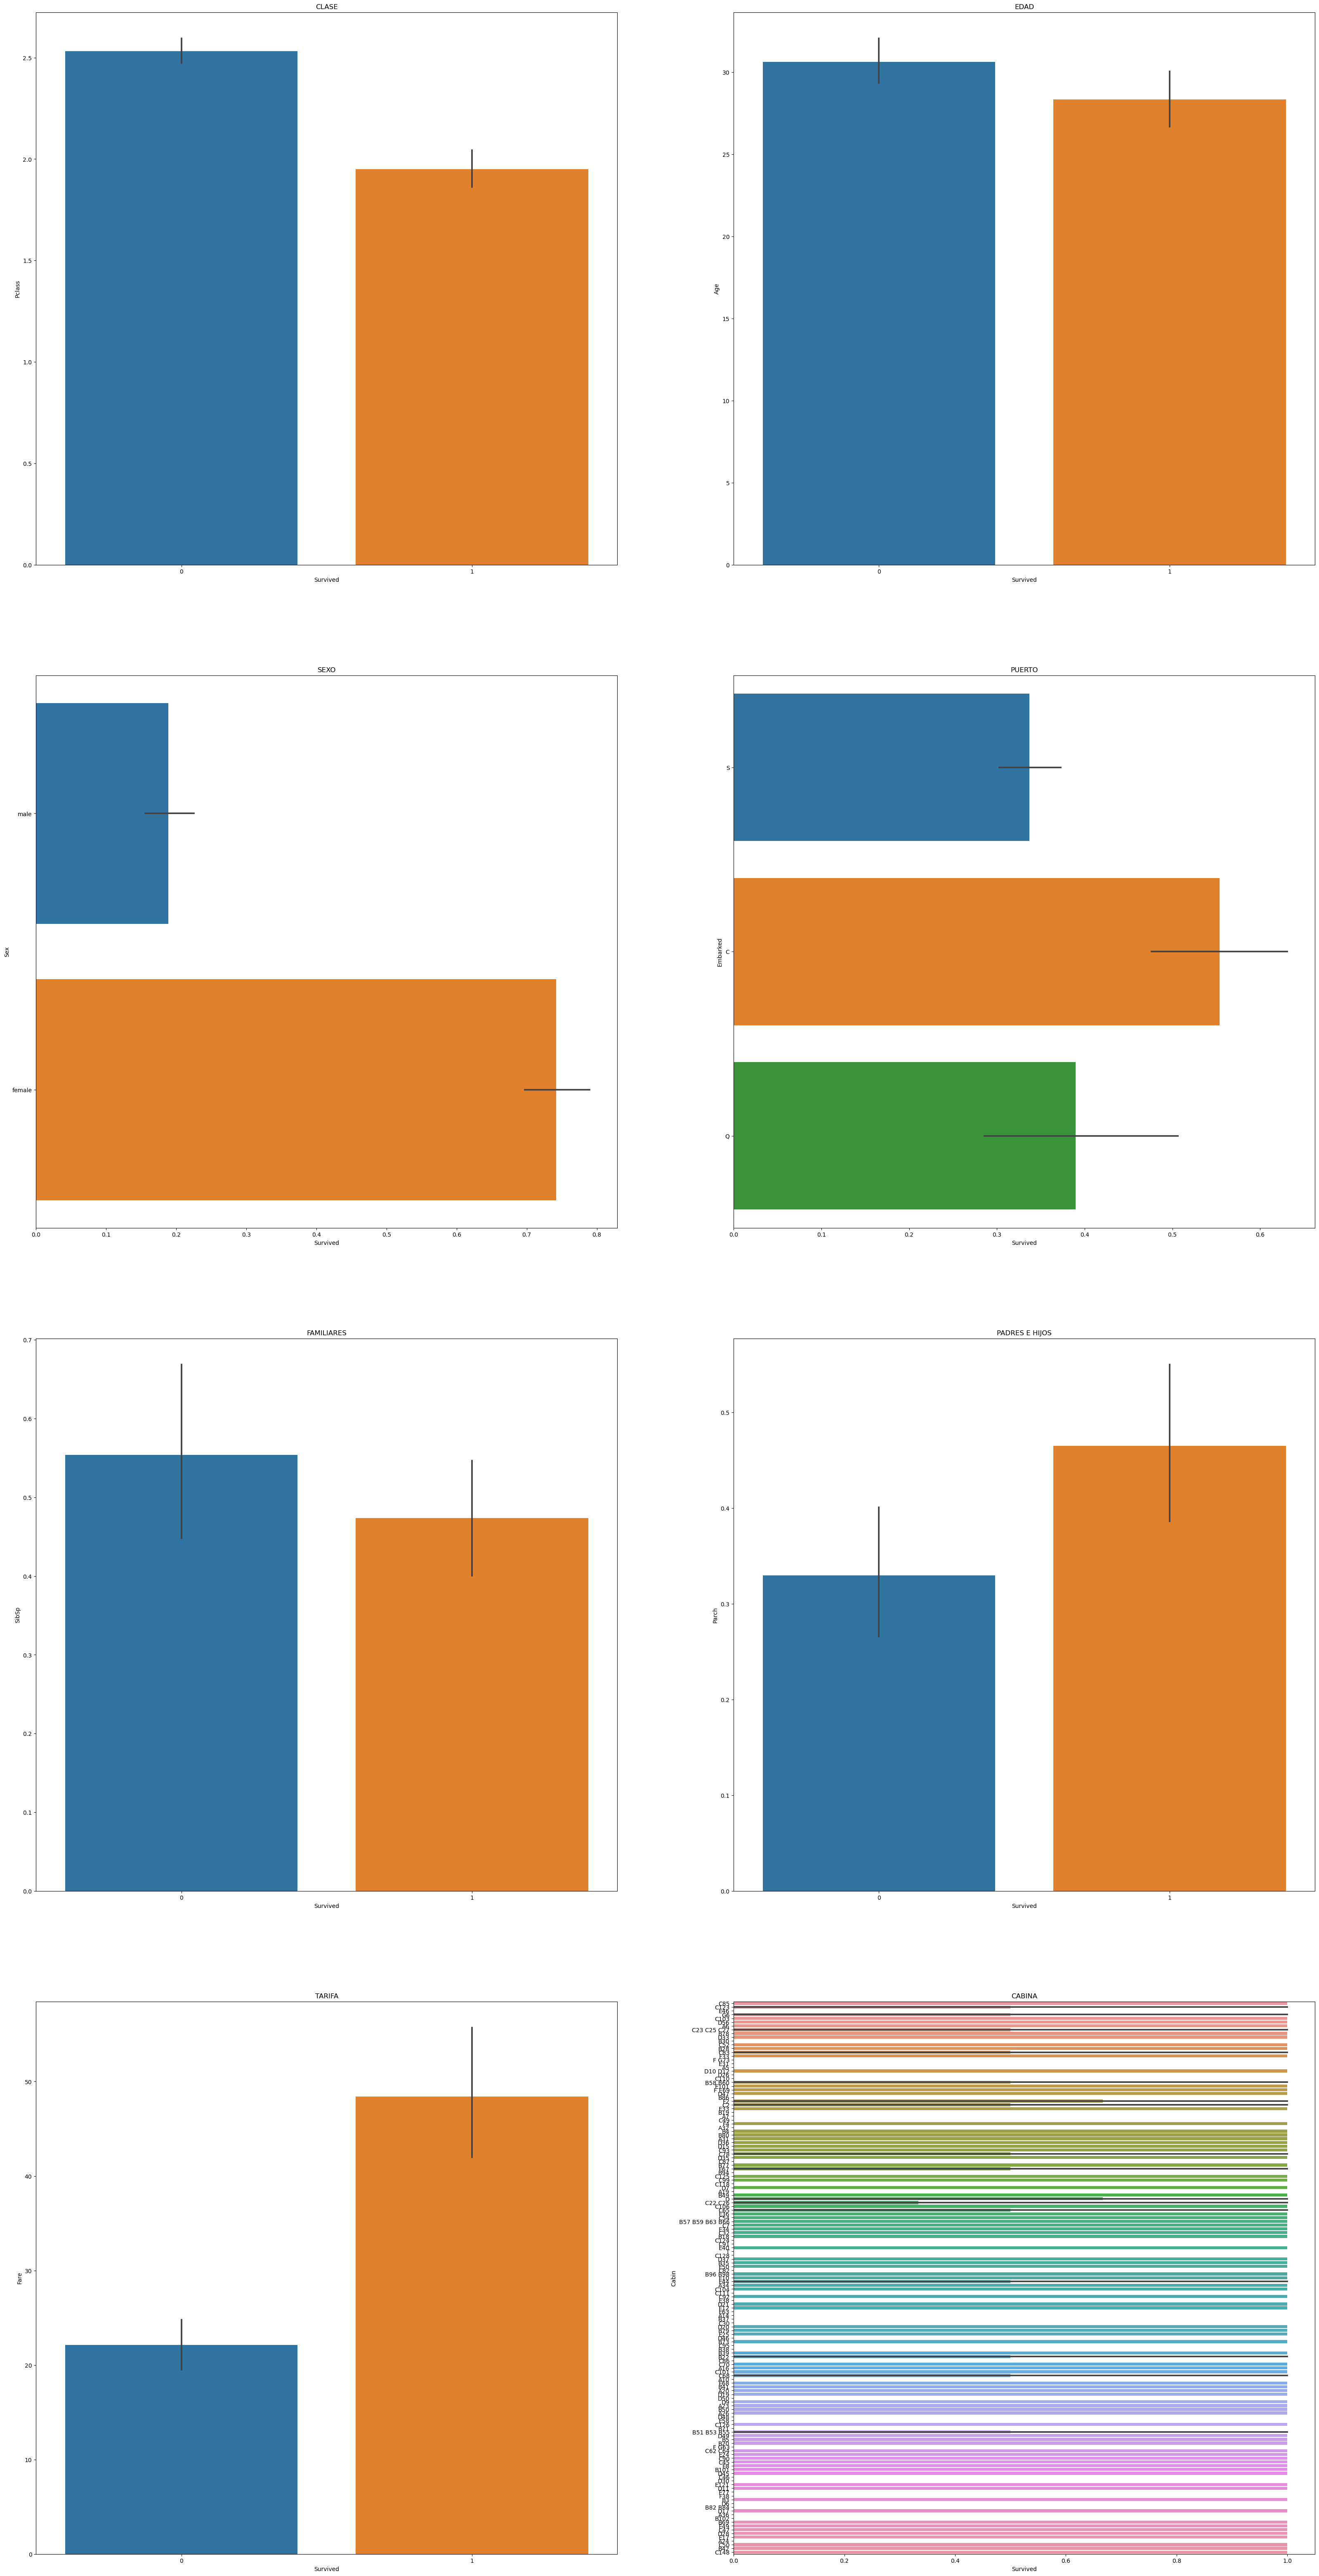

In [13]:
#Comparamos nuestra variable objetivo con las demas, para ver si hay alguna relación
fig, axes = plt.subplots(4, 2, figsize = (40, 80))
sns.barplot(ax = axes[0, 0], x = 'Survived', y = 'Pclass', data = dsTitanic).set(title = "CLASE");
sns.barplot(ax = axes[0, 1], x = 'Survived', y = 'Age', data = dsTitanic).set(title = "EDAD");
sns.barplot(ax = axes[1, 0], x = 'Survived', y = 'Sex', data = dsTitanic).set(title = "SEXO");
sns.barplot(ax = axes[1, 1], x = 'Survived', y = 'Embarked', data = dsTitanic).set(title = "PUERTO");
sns.barplot(ax = axes[2, 0], x = 'Survived', y = 'SibSp', data = dsTitanic).set(title = "FAMILIARES");
sns.barplot(ax = axes[2, 1], x = 'Survived', y = 'Parch', data = dsTitanic).set(title = "PADRES E HIJOS");
sns.barplot(ax = axes[3, 0], x = 'Survived', y = 'Fare', data = dsTitanic).set(title = "TARIFA");
sns.barplot(ax = axes[3, 1], x = 'Survived', y = 'Cabin', data = dsTitanic).set(title = "CABINA");

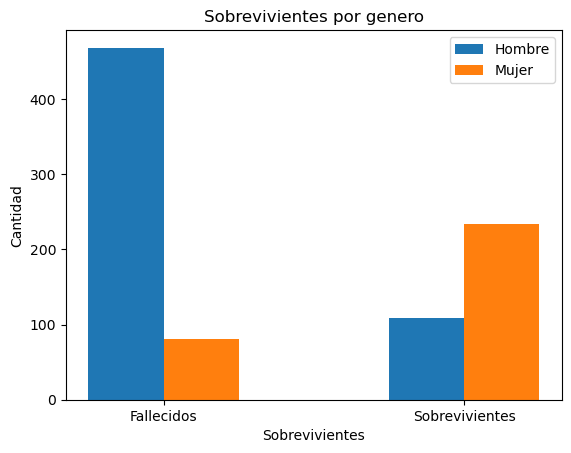

In [14]:
counts = dsTitanic.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Ancho de barra
bar_width = 0.25
index = counts.index

fig, ax = plt.subplots()

# Definir las barras para cada genero
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='Hombre')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='Mujer')

# Etiquetas
ax.set_xlabel('Sobrevivientes')
ax.set_ylabel('Cantidad')
ax.set_title('Sobrevivientes por genero')
ax.set_xticks(index)
ax.set_xticklabels(['Fallecidos', 'Sobrevivientes'])
ax.legend()

plt.show()

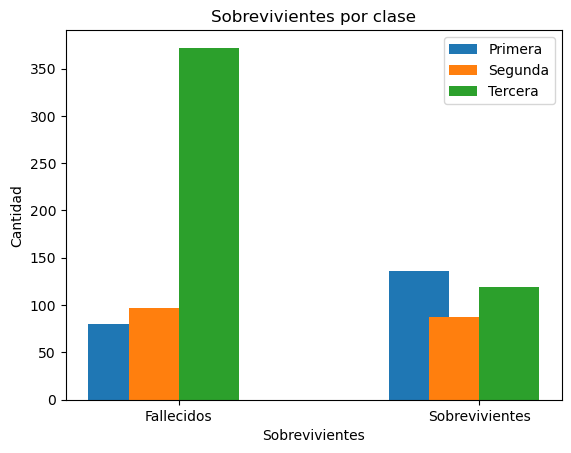

In [15]:
counts = dsTitanic.groupby(['Survived', 'Pclass']).size().unstack().fillna(0)

# Ancho de barra
bar_width = 0.2
index = counts.index

fig, ax = plt.subplots()

# barras para las clases
bar1 = ax.bar(index - bar_width/1, counts[1], bar_width, label='Primera')
bar2 = ax.bar(index - bar_width/3, counts[2], bar_width, label='Segunda')
bar3 = ax.bar(index + bar_width/2, counts[3], bar_width, label='Tercera')

# etiquetas
ax.set_xlabel('Sobrevivientes')
ax.set_ylabel('Cantidad')
ax.set_title('Sobrevivientes por clase')
ax.set_xticks(index)
ax.set_xticklabels(['Fallecidos', 'Sobrevivientes'])
ax.legend()

plt.show()

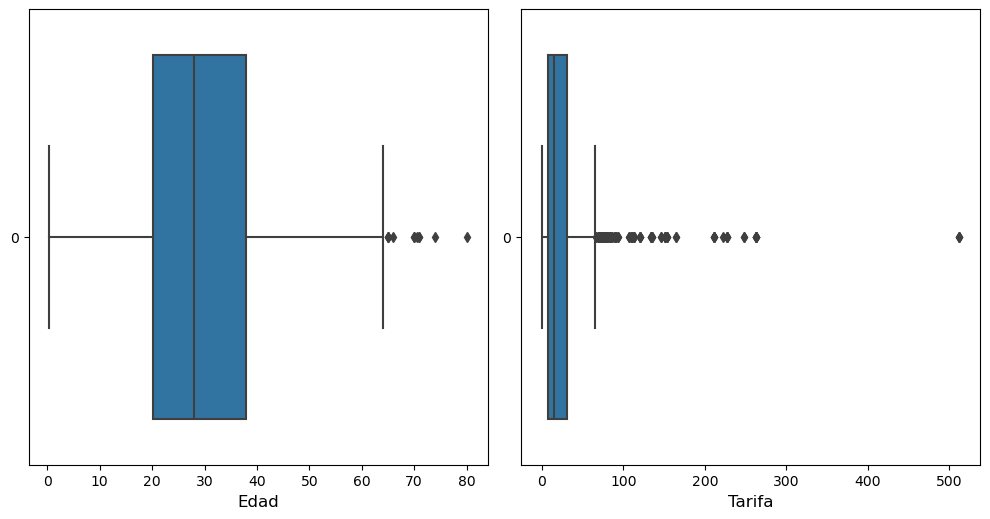

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Mantenemos la disposición de filas y columnas

# Crear boxplot para edad
sns.boxplot(dsTitanic['Age'], ax=axs[0, 0], orient='h')
axs[0, 0].set_xlabel('Edad', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para tarifa
sns.boxplot(dsTitanic['Fare'], ax=axs[0, 1], orient='h')
axs[0, 1].set_xlabel('Tarifa', fontsize=12)  # Cambiamos a 'xlabel'

# Eliminar el último eje, ya que no se utiliza
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 0])

plt.tight_layout()
plt.show()

- Podemos ver que hay una correlación entre el sexo y la supervivencia, la mayor probabilidad de supervivencia en el naufragio la tenían las mujeres.
- La edad tambien marca un factor importante en la supervivencia.
- Hay una clara relación entre la clase en la que se viaja y la supervivencia, la primera clase tenia mas oportunidades de sobrevivir que otras clases. - Hay una marcada diferencia entre la tasa de supervivencia de los hombres de 20 a 35 años que viajaban en primera clase sobre los demás.
- El barco llevaba una gran tripulación de tercera clase, de esta un gran numero entre hombres y mujeres viajaban solos, con muy poca población de personas mayores de 50 años, muy probablemente estaban en viaje laboral.
- El dato de cabina no ofrece información relevante, dado que tienen muchos faltantes.
- El id del pasajero en el dataset, el tiquete y el nombre no ofrecen ningun tipo de información relevante para la supervivencia.
- No hay ningún tipo de relación entre variables como la zona de embarque y la supervivencia, pero si lo hay entre la tarifa y la supervivencia, entre más caro era tu pasaje, más posibilidades tenías de sobrevivir, esto obviamente va ligado a la clase en la que se viajaba.
- La cantidad de mujeres fallecidas de tercera clase es muy alta, probablemente a estas solo se les dio prioridad si tenían niños. Las mujeres de segunda y primera clase fueron prioridad en el uso de los botes salvavidas.

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

De las variables de interes,  vemos que edad tiene valores atipicos y faltantes, por lo tanto trataremos esta columna. Teniendo en cuenta el EDA eliminaremos los registros que tienen faltantes en edad, de esta forma evitaremos sesgos al imputar la media, dado que la supervivencia era afectada tambien por edades menores, y la mediana puede no ser presisa.

In [17]:
# Eliminamos faltantes
df_T = dsTitanic.dropna(subset=['Age'])


In [18]:
df_T.shape

(714, 12)

In [19]:
df_T.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [20]:
# Tratamos atipicos cambiandolos por la edad mayor en la norma que seria de 60 a 65, 
# esto con la finalidad de no alterar mucho los resultados al usar la mediana

df_T.loc[df_T['Age'] > 63, 'Age'] = 60

Text(0.5, 24.99999999999988, 'Edad')

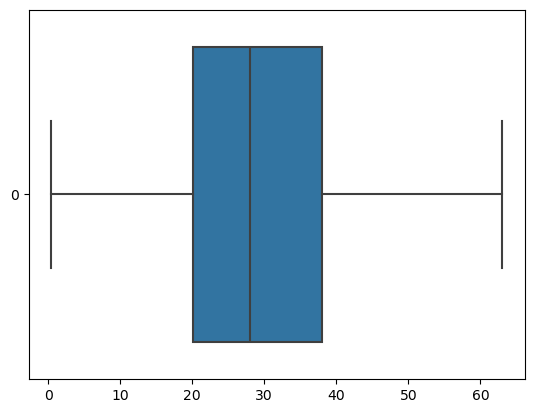

In [21]:
sns.boxplot(df_T['Age'], orient='h')
axs[0, 0].set_xlabel('Edad', fontsize=12)  # Cambiamos a 'xlabel'

In [22]:
#Convertimos la variable Sex a numero para mejorar el modelo
df_T['Sex'] = df_T['Sex'].map({'male': 1, 'female': 0})

In [23]:
df_T.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Para este modelo, usaremos las caracteristicas de edad, genero, y clase.

In [24]:
#Eliminamos las columnas que no usaremos para entrenar el modelo

# Array con las columnas a eliminar
columnas_eliminar = ['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked']

# Eliminar las columnas
df_T = df_T.drop(columns = columnas_eliminar)

In [25]:
# Confirmamos el proceso
df_T.head(5)

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [26]:
#Volvemos a preparar nuestras variables con el dataset listo 
predictors_col2 = ['Pclass', 'Sex', 'Age']
target_col = ['Survived']

In [27]:
predictors = df_T[predictors_col2]
target = df_T[target_col]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=357)

## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [67]:
tree = DecisionTreeClassifier()

In [68]:
arbol = tree.fit(x_train, y_train)

[Text(0.32536764705882354, 0.9722222222222222, 'X[1] <= 0.5\ngini = 0.482\nsamples = 571\nvalue = [340, 231]'),
 Text(0.15196078431372548, 0.9166666666666666, 'X[0] <= 2.5\ngini = 0.394\nsamples = 211\nvalue = [57, 154]'),
 Text(0.04411764705882353, 0.8611111111111112, 'X[2] <= 3.0\ngini = 0.136\nsamples = 123\nvalue = [9, 114]'),
 Text(0.024509803921568627, 0.8055555555555556, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.014705882352941176, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03431372549019608, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06372549019607843, 0.8055555555555556, 'X[2] <= 23.5\ngini = 0.123\nsamples = 121\nvalue = [8, 113]'),
 Text(0.05392156862745098, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.07352941176470588, 0.75, 'X[2] <= 27.5\ngini = 0.162\nsamples = 90\nvalue = [8, 82]'),
 Text(0.0392156862745098, 0.6944444444444444, 'X[2] <= 24.5\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.019607

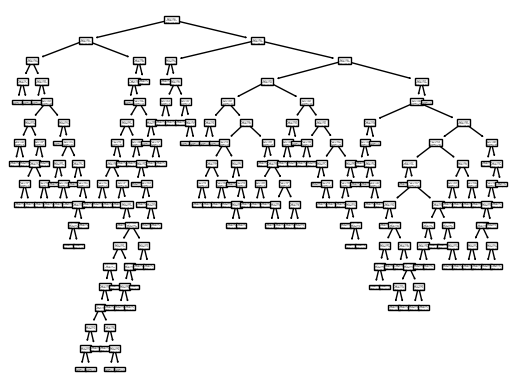

In [69]:
#Confirmamos la creación del modelo
plot_tree(arbol)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [70]:
# Evaluamos el modelo realizando predicciones con los datos de test
predicciones = arbol.predict(x_test)

In [71]:
#vemos las predicciones
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [72]:
# Revisaremos las metricas para calcular la exactitud del modelo
exactitud = accuracy_score(y_test, predicciones)

print("Exactitud:", exactitud)

Exactitud: 0.8251748251748252


In [73]:
#Veremos la precisión del modelo para cada resultado de la variable Survived
precision_fallece = precision_score(y_test, predicciones, labels=[0], average=None)
precision_sobrevive = precision_score(y_test, predicciones, labels=[1], average=None)
print("Precisión para los decesos:", precision_fallece)
print("Precisión para los sobrevivientes:", precision_sobrevive)

Precisión para los decesos: [0.8172043]
Precisión para los sobrevivientes: [0.84]


In [74]:
#Revisaremos el recall para cada resultado de la variable Survived
recall_fallece = recall_score(y_test, predicciones, labels=[0], average=None)
recall_sobrevive = recall_score(y_test, predicciones, labels=[1], average=None)

print("Recall para fallecidos :", recall_fallece)
print("Recall para sobrevivientes:", recall_sobrevive)

Recall para fallecidos : [0.9047619]
Recall para sobrevivientes: [0.71186441]


In [75]:
#Revisaremos el F1 score para cada resultado de la variable Survived
f1_fallece = f1_score(y_test, predicciones, labels=[0], average=None)
f1_sobrevive = f1_score(y_test, predicciones, labels=[1], average=None)

print("F1 Score para fallecidos :", f1_fallece)
print("F1 Score para sobrevivientes:", f1_sobrevive)

F1 Score para fallecidos : [0.85875706]
F1 Score para sobrevivientes: [0.7706422]


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [76]:
# Examinamos la matriz de confución
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,76,8
1,17,42


## 8. Interpretar, analizar y documentar los resultados obtenidos

Teniendo en cuenta el balance del modelo y que tenemos más datos de fallecidos que de sobrevivientes, el modelo estaría un poco desbalanceado, por ende al aumentar la cantidad de datos de test, disminuía la eficacia en la predicción de sobrevivientes, la mejor medida para los datos del testeo fue el 0.2.

Podemos observar que en este caso el modelo es bastante exacto (0.82), esto teniendo en cuenta el balance de los datos y la limpieza de los mismos, nos permite ver la importancia de normalizar los datos y de tratar de forma adecuada los faltantes y las incidencias, se podría pensar que el modelo se puede mejorar realizando el análisis de los datos con las variables de familiares y parientes, dado que este podría ser un factor clave de sobrevivencia en el uso de botes salvavidas, pero por la cantidad de solteros en el viaje, no se considera realmente relevante.

La precisión fue alta, esta sobre el 80% tanto para sobrevivientes como fallecidos, lo que hace que el modelo tenga una buena cantidad de aciertos.

El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Es decir, de todas las instancias que son realmente positivas, cuantas fueron identificadas por el modelo, en este caso vemos el 90% para fallecidos, que tenían la mayor cantidad de muestras, y el 71% para sobrevivientes, por lo tanto el modelo es más acertado para los fallecidos que para los sobrevivientes.

Con F1 score nos muestra que efectivamente nuestro modelo es muy bueno clasificando los resultados, en los sobrevivientes muestra que hay un desempeño moderado, pero solo del 77%, mientras que para fallecidos el desempeño mejora mucho llegando a un 85%, esto nuevamente se debe al número de muestras que se tenían.

Se puede concluir que el modelo de árbol de decisión fue una buena opción para este dataset, se tendría que trabajar con los datos e intentar equilibrarlos un poco más teniendo en cuenta que esto haría perder muchos registros para el entrenamiento, también se podría intentar usar otras variables como los familiares y numero de padres e hijos, normalizando claro esta los datos en estas.
